# <font color="blue">Performing OCR on Invoice Documents</font>

### <font color="green">Situation </font>
Mark works at an office where his job is to go through the invoices received and record the sender and the amount billed to a spreadsheet. It takes him only 1 minute to see the invoice and update the sheet. Still he finds it tedious and wants to automate this task. The main motivation for him is that he can then play on his system without any distractions. Will you help Mark in his pursuit of happiness?

### <font color="green">Your Task</font>
In this assignment, you will implement a OCR system, which looks at an image of the invoice and finds the following:

1. The Billing Amount ( 15 Marks )
1. Sender and Receiver Email IDs ( 15 Marks )

That's it! 

It requires knowledge of OCR to get the data from the image and then some basic python skills to get the required values from the recognized text.

The assignment will be manually graded ( so that you cannot simply look at the image and simply do a `print(billing_amount)`.

More information is given in the respective section.

## <font color="blue">Import Libraries.</font>
You may create a new cell and import other libraries if you want.

In [1]:
import pytesseract
import keras_ocr
import matplotlib.pyplot as plt
import cv2

## <font color="blue">Read and display the Test Image</font>

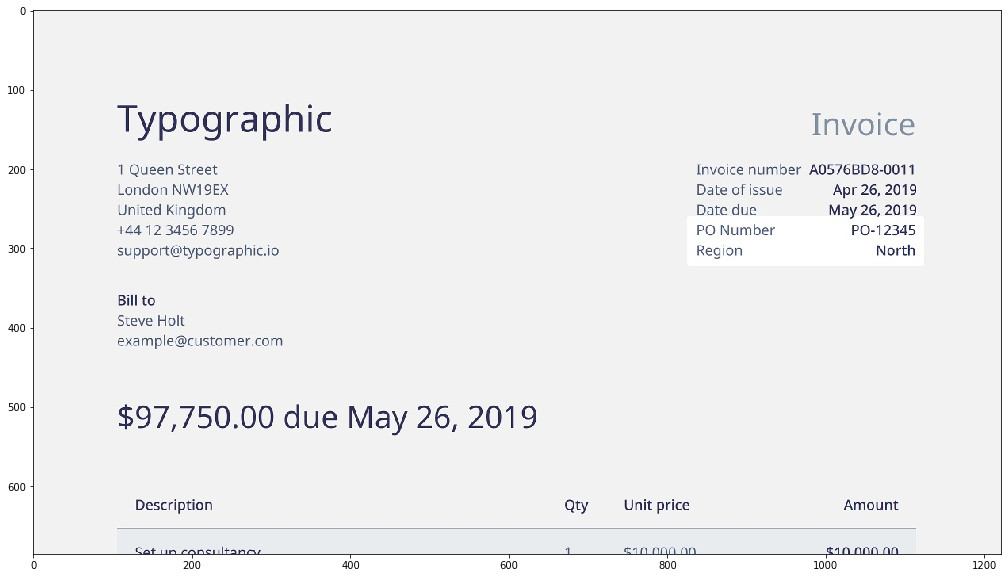

In [2]:
doc_img = cv2.imread('../resource/asnlib/publicdata/invoice.jpg', cv2.IMREAD_COLOR)
fig = plt.figure(figsize=(20, 10))
plt.imshow(doc_img[:,:,::-1])
plt.show()

## <font color="blue">Perform OCR</font>

You need to write the code for performing OCR on the input image. You will have to apply the concepts learned in the previous sections to perform OCR on the above image.

After you perform the OCR - you have to parse the output so that you only print the email IDs and billing amount in $

### <font color="green">An example output is given below</font>
```
Extracted Billing Amount:
$97,750.00

Extracted Email IDs:
support@typographic.io
example@customer.com
```

In [3]:
billing_amount = []
email_ids = []

###
### YOUR CODE HERE
###

import re # using regex will ease the use of finding all important data

image = cv2.resize(doc_img, None, fx=1.5, fy=1.5) # Rescale, emails are too small
image = cv2.adaptiveThreshold(image[:,:,1], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5) # apply threshold
image = cv2.merge((image, image, image)) # merging to CV8UC3
image_trhesholded = image.copy()

text = pytesseract.image_to_string(image) # Text predictions
email_ids = re.findall(r'\S+@\S+', text) # Find all emails
billing_amount = re.findall(r'\$[^ ]+', text) # Find all amounts

print(f'Extracted Billing Amount:\n{billing_amount[0]}') # Print billing
print() # dummy
print(f'Extracted EMail IDs:\n{email_ids[0]}\n{email_ids[1]}') # Print emails

Extracted Billing Amount:
$97,750.00

Extracted EMail IDs:
support@typographic.io
example@customer.com


### Just to see what the CRAFT text detection algorithm is cropping [Non Requested]

Looking for /home/ccc_v1_w_d24cd_40494/asn138717_9/asn138718_1/work/.keras-ocr/craft_mlt_25k.h5


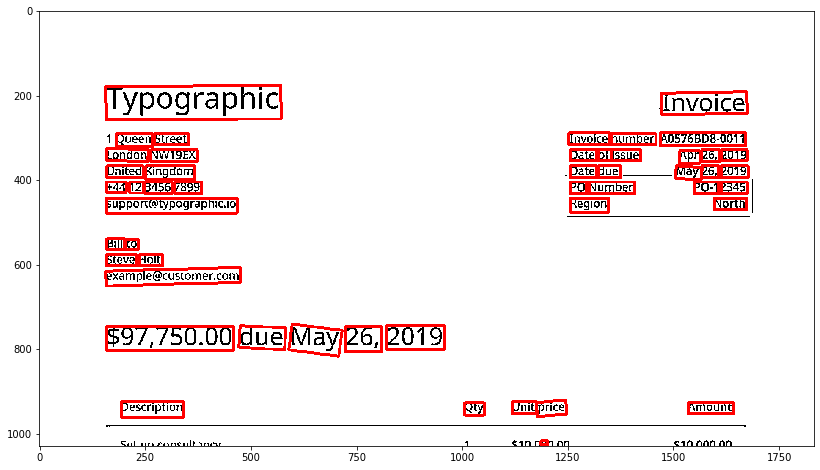

In [4]:
detector = keras_ocr.detection.Detector()
box_detections = detector.detect([image])[0]
image_with_boxes_in_text = keras_ocr.tools.drawBoxes(image=image, boxes=box_detections)
plt.figure(figsize=[15,8])
plt.imshow(image_with_boxes_in_text)
plt.show()

#### Let's feed Tesseract!

In [5]:
config = ('--psm 6')
figsize=[20,10]

text_and_box_predictions = []

for i, box in enumerate(box_detections):   # for each box
    image_cropped = keras_ocr.tools.warpBox(image, box) # crop the current text detected on the image
    text = pytesseract.image_to_string(image_cropped, config=config) # input to tesseract to predict
    if text: # if text detected
        text_and_box_predictions.append((text, box)) # append text and box

#### Let's plot Teseract marks

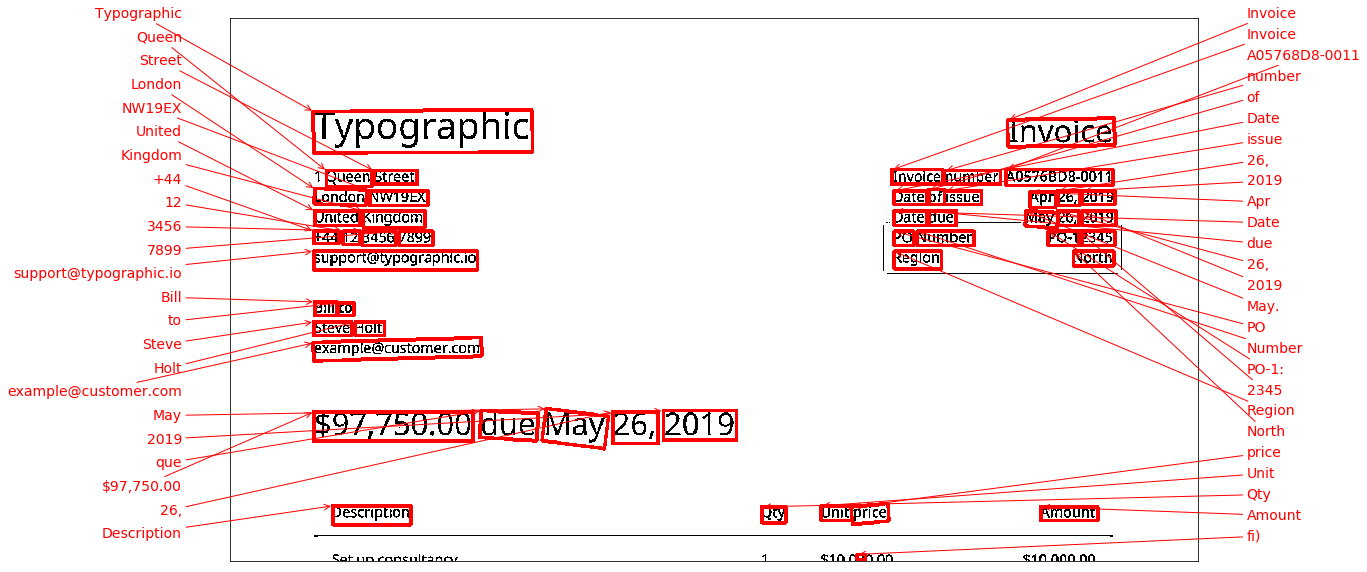

In [6]:
fig, ax = plt.subplots(figsize=figsize)
image_tesseract = image_with_boxes_in_text.copy()
keras_ocr.tools.drawAnnotations(image_tesseract, text_and_box_predictions, ax=ax)
plt.imshow(image_tesseract)
plt.show()

#### Let's feed Keras OCR

In [7]:
pipeline = keras_ocr.pipeline.Pipeline(scale=1)
kerasocr_predictions = pipeline.recognize([image])

Looking for /home/ccc_v1_w_d24cd_40494/asn138717_9/asn138718_1/work/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/ccc_v1_w_d24cd_40494/asn138717_9/asn138718_1/work/.keras-ocr/crnn_kurapan.h5


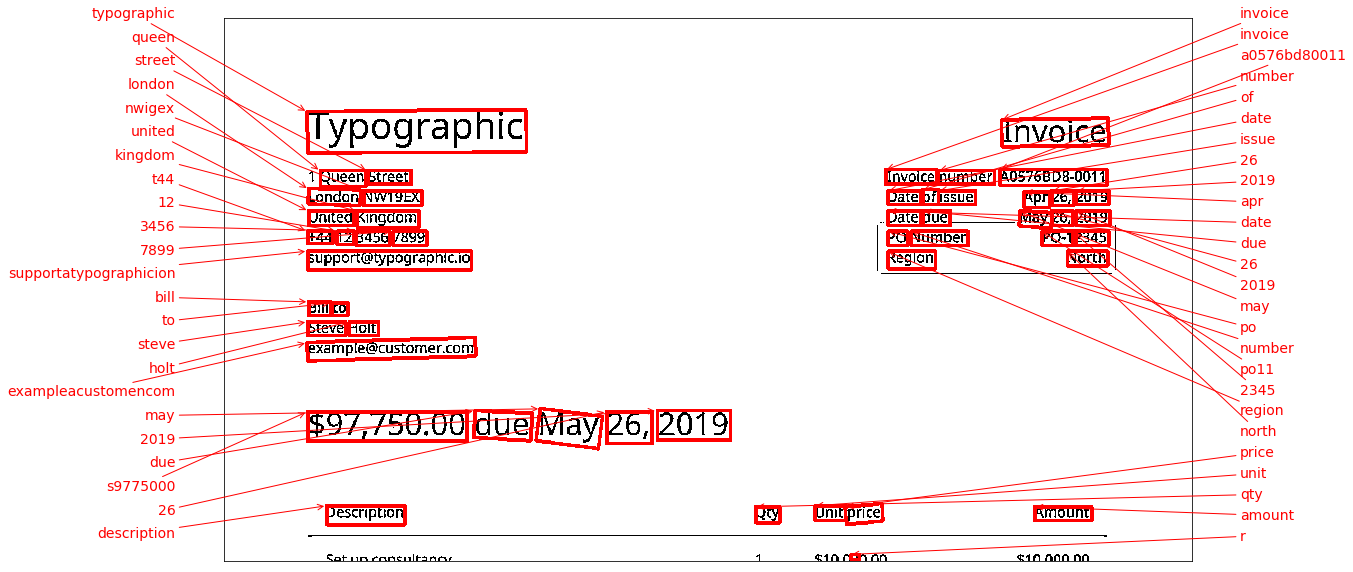

In [8]:
fig, ax = plt.subplots(figsize=figsize)
image_kerasocr = image_with_boxes_in_text.copy()
keras_ocr.tools.drawAnnotations(image_kerasocr, kerasocr_predictions[0],ax=ax)
plt.imshow(image_kerasocr)
plt.show()

#### <font color="green">Challenge: Try and build an advanced version of the invoice reader where it can find all other information</font>